<a href="https://colab.research.google.com/github/leovsm/Bootcamp-dio/blob/main/Desafio_de_projeto_An%C3%A1lise_de_dados_com_Python_e_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Pandas import

In [4]:
#The parameter "error_bad_lines=False" was necessary because the Database has errors on some rows
#The parameter "sep=";"" was necessary to adjust how the values are separated

df=pd.read_csv("/content/drive/MyDrive/DIO-Unimed/Gapminder.csv",error_bad_lines=False, sep=";")

In [ ]:
#Rename of the headers in order to them become clearer
df=df.rename(columns={"country":"Country", "continent":"Continent","year":"Year", "lifeExp":"Life Expectancy","pop":"Total Population", "gdpPercap":"GDP per capta"})


In [ ]:
#Total of rows and columns
df.shape

(3312, 6)

In [ ]:
#General information of the Database
df.describe()

In [ ]:
#Creation of a Database slice based on the "Continent" = "Oceania"
Oceania = df.loc[df["Continent"] =="Oceania"]
Oceania.head()
Oceania["Continent"].unique()

array(['Oceania'], dtype=object)

In [ ]:
#Count of unique countries per Continent
df.groupby("Continent")["Country"].nunique()

Continent
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: Country, dtype: int64

In [10]:
#Creating the database
df1=pd.read_excel("/content/drive/MyDrive/DIO-Unimed/Aracaju.xlsx")
df2=pd.read_excel("/content/drive/MyDrive/DIO-Unimed/Fortaleza.xlsx")
df3=pd.read_excel("/content/drive/MyDrive/DIO-Unimed/Natal.xlsx")
df4=pd.read_excel("/content/drive/MyDrive/DIO-Unimed/Recife.xlsx")
df5=pd.read_excel("/content/drive/MyDrive/DIO-Unimed/Salvador.xlsx")
df=pd.concat([df1,df2,df3,df4,df5])

In [7]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
df["LojaID"]=df["LojaID"].astype("object")

In [12]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#Create a new column that will be the column "Vendas" multiplied by column "Qtde"
df["Receita"]=df["Vendas"].mul(df["Qtde"])

In [15]:
#Checking the 3 largest values for the column "Receita". Same approach for "n.smallest"
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [17]:
#Sorting the rows by the ascending values of the column "Receita"
df.sort_values("Receita",ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [20]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [22]:
#Transforming the column "Data" into "Date" type
df["Data"]=pd.to_datetime(df["Data"])

In [24]:
#Checking the sum of "Receita" by Year
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [28]:
#Creating columns for the sell "Quarter,"Month", and "Day"
df["quarter"],df["mes_venda"],df["dia_venda"]=(df["Data"].dt.quarter,df["Data"].dt.month,df["Data"].dt.day)

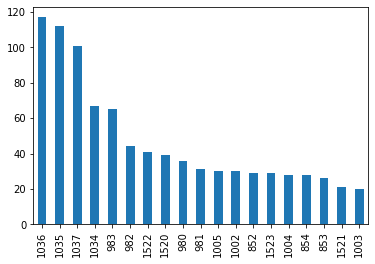

In [34]:
df["LojaID"].value_counts().plot.bar()

In [35]:
import matplotlib.pyplot as plt

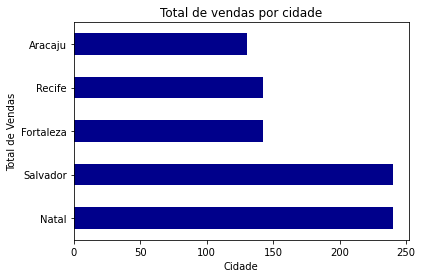

In [43]:
df["Cidade"].value_counts().plot.barh(title="Total de vendas por cidade", color="darkblue")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")
plt.savefig("Teste_01.png")

In [44]:
#A different approch to upload files
from google.colab import files
file = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [48]:
df=pd.read_excel("AdventureWorks.xlsx")
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [68]:
#Creating some additional columns for furhter analysis
df["Custo"]=df["Custo Unitário"].mul(df["Quantidade"])
df["Lucro"]=df["Valor Venda"] - df["Custo"]
df["Tempo de envio"]= (df["Data Envio"]-df["Data Venda"]).dt.days #Since we are working with dates, we need to add this parameter to extract only the days, and not the string
df.head()


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7


In [55]:
#Creating a new dabase for the profit (based on the Date and Brand)
lucro_ano=df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()

Text(0, 0.5, 'Produto')

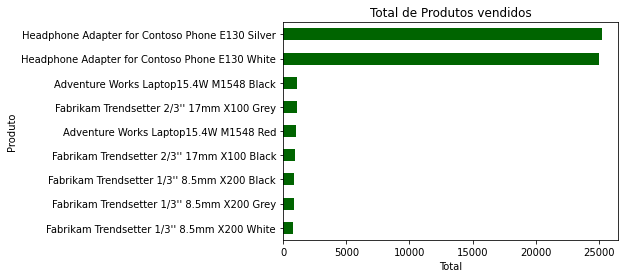

In [57]:
#Creating a graph to check the top selling products
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos vendidos",color="darkgreen")
plt.xlabel("Total")
plt.ylabel("Produto")

In [58]:
df_2009=df[df["Data Venda"].dt.year==2009]

Text(0, 0.5, 'Lucro')

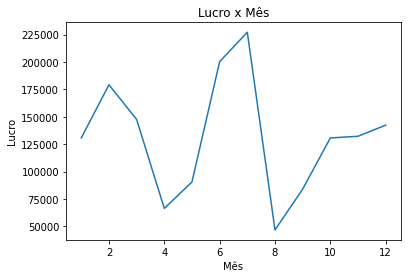

In [62]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

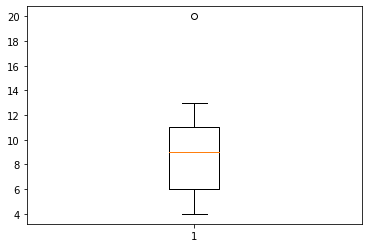

In [69]:
#Checking the values for the "Tempo de envio"
plt.boxplot(df["Tempo de envio"]);

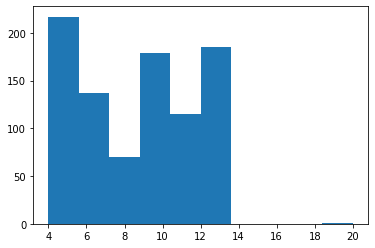

In [70]:
plt.hist(df["Tempo de envio"]);